# Gender Bias Classifier(s)
Supervised, conditional, descriptive classifer(s) to be trained and evaluated on annotated, archival metadata descriptions to determine:
  1. Which type of gender bias is most likely for a given archival metadata description?
  2. How likely is a given type of gender bias for a given archival metadata description?
  
*Trying Decision Tree before Maximum Entropy classifier because it's more transparent, making it easier to interpret and understand*
***

* By: Lucy Havens
* Data Source: annotated text from the [online archives catalog](https://archives.collections.ed.ac.uk/)
* Data Provider: Centre for Research Collections, University of Edinburgh
* Start Date: November 12, 2020
* Project: PhD project 1

***

**References:**
* Steven Bird, Ewan Klein and Edward Loper. (2019) [6. Learning to Classify Text.](https://www.nltk.org/book/ch06.html) *Natural Language Processing with Python*.

### Feature Set
Based on the taxonomy of gender bias in text by [Hitti, Jang, Moreno, and Pelletier (2019)](https://www.aclweb.org/anthology/W19-3802):

  1. Structural Bias

     A. Gender Generalization (pronoun usage)

     B. Explicit Marking of Sex

  2. Contextual Bias

     A. Societal Stereotype

     B. Behavioral Stereotype

In [1]:
# WHICH???
# genbias = ["is-structural", "is-contextual"]
# genbias_s = ["is-generalization", "is-marking-sex"]
# genbias_c = ["is-societal", "is-behavioral"]

# genbias = ["is-generalization", "is-marking-sex", "is-societal", "is-behavioral"]

### Classifier 1: Decision Tree

##### PRACTICE

In [2]:
# Import libraries
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [3]:
# Load dataset
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
# Split dataset into training set and test set
x_train, x_test, y_train, y_test = train_test_split(df[data.feature_names], df['target'], random_state=0)

In [5]:
# Make an instance of the ML model imported above, scikit-learn's decision tree classifier
# Set tree depth of 2, meaning maximum of 2 decisions before prediction made
clf = DecisionTreeClassifier(max_depth = 2, random_state = 0)

In [6]:
# Train the model on training set, storing info learned from data
clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [7]:
# Predict for one observation
clf.predict(x_test.iloc[0].values.reshape(1, -1))

array([2])

In [8]:
# Predict for multiple observations
clf.predict(x_test[0:10])

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1])

In [9]:
# Measure model performance: accuracy
# (correct predictions / total number of data points)
score = clf.score(x_test, y_test)
print(score)

0.8947368421052632


In [10]:
# Measusure: precision

In [ ]:
# Measure: recall

In [11]:
# Measure: F-score

In [12]:
# Find optimal max depth
max_depth_range = list(range(1, 6))
accuracy = []  # store avg RMSE (???) for each value of max depth
for depth in max_depth_range:
    clf = DecisionTreeClassifier(max_depth = depth, random_state = 0)
    clf.fit(x_train, y_train)
    score = clf.score(x_test, y_test)
    accuracy.append(score)

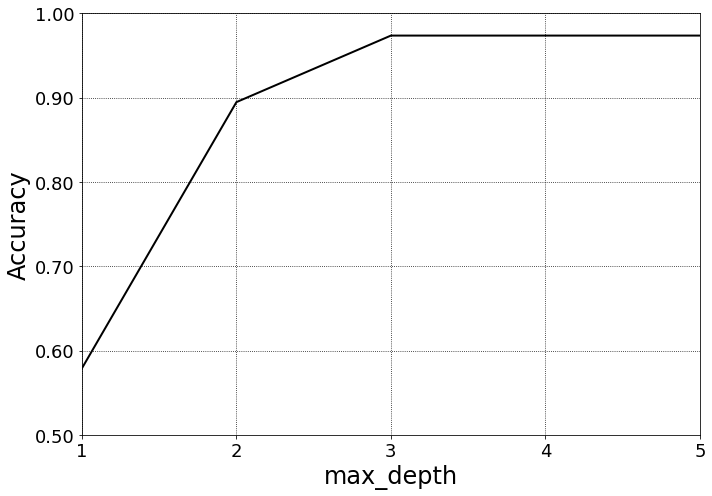

In [13]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10,7))

ax.plot(max_depth_range,accuracy, lw=2, color='k')
ax.set_xlim([1,5])
ax.set_ylim([.50, 1.00])
ax.grid(True, axis = 'both', zorder = 0, linestyle = ':', color = 'k')

yticks = ax.get_yticks()
y_ticklist = []
for tick in yticks:
    y_ticklist.append(str(tick).ljust(4, '0')[0:4])

ax.set_yticklabels(y_ticklist)
ax.tick_params(labelsize = 18)
ax.set_xticks([1,2,3,4,5])
ax.set_xlabel('max_depth', fontsize = 24)
ax.set_ylabel('Accuracy', fontsize = 24)
fig.tight_layout()